In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from IPython.display import display
import os

In [3]:

ruta = os.path.join(os.getcwd(), "..", "..", "data", "processed", "peleadores.parquet")
df = pd.read_parquet(ruta)
df.head()

,Peleador,Fecha,KD_A,SIG_STR_A,TD_PORC_A,SUB_ATT_A,REV_A,CTRL_A,TD_x_A,TD_y_A,...,STR_GROUND_y_A,Peleas,Puntos,Racha,Victorias_KO,Victorias_Sub,Victorias_Decision,Derrotas_KO,Derrotas_Sub,Derrotas_Decision
0,Laverne Clark,2000-09-22,0.250000,0.57,0.250000,0.0,0.5,84.750000,0.500000,0.500000,...,8.500000,4,0.023375,0,2,0,1,0,1,0
1,Frank Caracci,1999-01-08,0.000000,0.00,0.000000,1.0,0.0,0.000000,0.000000,2.000000,...,0.000000,1,0.000000,0,0,0,0,1,0,0
2,Mikey Burnett,1999-01-08,1.000000,0.31,0.000000,1.0,0.0,0.000000,0.000000,0.000000,...,9.000000,1,0.010604,1,0,0,1,0,0,0
3,Townsend Saunders,1999-01-08,0.000000,0.53,0.000000,0.0,0.0,0.000000,0.000000,6.000000,...,0.000000,1,0.000000,0,0,0,0,0,0,1
4,Pedro Rizzo,2003-11-21,0.461538,0.35,0.102308,0.0,0.0,70.384615,0.153846,0.538462,...,5.076923,13,0.736241,2,6,0,2,2,0,3


In [4]:
print("\nTipos de datos:")
print(df.dtypes.to_string())


Tipos de datos:
Peleador                      object
Fecha                 datetime64[ns]
KD_A                         float64
SIG_STR_A                    float64
TD_PORC_A                    float64
SUB_ATT_A                    float64
REV_A                        float64
CTRL_A                       float64
TD_x_A                       float64
TD_y_A                       float64
TOTAL_STR_x_A                float64
TOTAL_STR_y_A                float64
STR_HEAD_x_A                 float64
STR_HEAD_y_A                 float64
STR_BODY_x_A                 float64
STR_BODY_y_A                 float64
STR_LEG_x_A                  float64
STR_LEG_y_A                  float64
STR_DISTANCE_x_A             float64
STR_DISTANCE_y_A             float64
STR_CLINCH_x_A               float64
STR_CLINCH_y_A               float64
STR_GROUND_x_A               float64
STR_GROUND_y_A               float64
Peleas                         int64
Puntos                       float64
Racha                

In [5]:
"""SUB (Sumisiones): Tiene una distribución altamente sesgada a la derecha, con la mayoría de los valores concentrados 
en los niveles más bajos y algunos valores extremadamente altos, 
lo que indica que la mayoría de los peleadores consiguen pocas sumisiones en sus carreras."""

print("\nResumen estadístico de columnas numéricas:")
pd.set_option('display.max_columns', None)
print(df.describe(include='all'))


Resumen estadístico de columnas numéricas:
             Peleador                          Fecha         KD_A  \
count            2439                           2439  2439.000000   
unique           2439                            NaN          NaN   
top     Laverne Clark                            NaN          NaN   
freq                1                            NaN          NaN   
mean              NaN  2017-09-25 18:16:58.450184448     0.163993   
min               NaN            1999-01-08 00:00:00     0.000000   
25%               NaN            2013-04-27 00:00:00     0.000000   
50%               NaN            2018-11-17 00:00:00     0.000000   
75%               NaN            2024-03-05 12:00:00     0.266667   
max               NaN            2025-02-15 00:00:00     3.000000   
std               NaN                            NaN     0.241532   

          SIG_STR_A    TD_PORC_A    SUB_ATT_A        REV_A       CTRL_A  \
count   2439.000000  2439.000000  2439.000000  2439.

In [6]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['KD_A', 'SIG_STR_A', 'TD_PORC_A', 'SUB_ATT_A', 'REV_A', 'CTRL_A',
       'TD_x_A', 'TD_y_A', 'TOTAL_STR_x_A', 'TOTAL_STR_y_A', 'STR_HEAD_x_A',
       'STR_HEAD_y_A', 'STR_BODY_x_A', 'STR_BODY_y_A', 'STR_LEG_x_A',
       'STR_LEG_y_A', 'STR_DISTANCE_x_A', 'STR_DISTANCE_y_A', 'STR_CLINCH_x_A',
       'STR_CLINCH_y_A', 'STR_GROUND_x_A', 'STR_GROUND_y_A', 'Peleas',
       'Puntos', 'Racha', 'Victorias_KO', 'Victorias_Sub',
       'Victorias_Decision', 'Derrotas_KO', 'Derrotas_Sub',
       'Derrotas_Decision'],
      dtype='object')


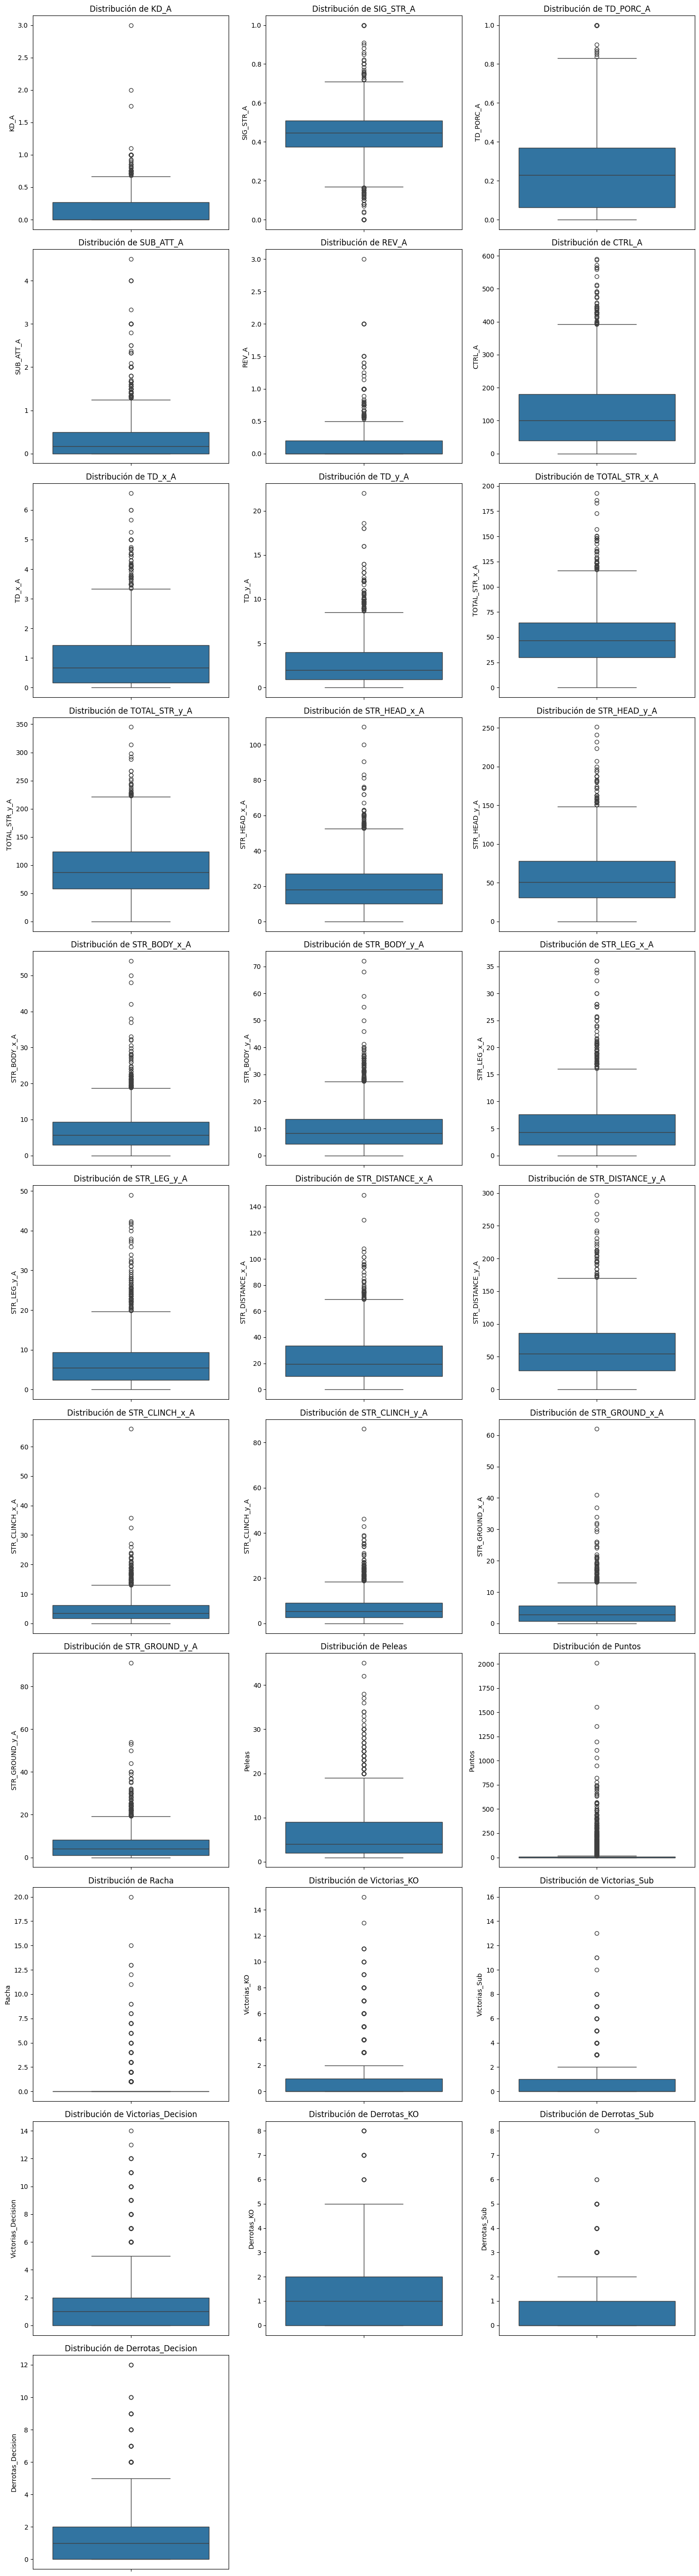

'Distribución sesgada a la derecha: La mayoría de los valores están concentrados \nen la parte baja de la escala, mientras que hay una gran cantidad de valores atípicos (outliers) hacia \nla derecha. Esto indica que la mayoría de los peleadores conectan pocos golpes significativos, \npero hay algunos casos excepcionales donde se conectan muchos. Para mejorar eso deberíamos estudiar realizar ciertas transformaciones.'

In [7]:
# Número de columnas
cols = 3

# Calcula el número de filas necesarias para los gráficos
rows = (len(numerical_columns) + cols - 1) // cols  # Redondeo hacia arriba

# Crear la figura
plt.figure(figsize=(5 * cols, 5 * rows))

# Crear los subgráficos
for i, col in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)  # Definir filas y columnas
    sns.boxplot(y=df[col])  # Usar 'y' para boxplot en vertical
    plt.title(f"Distribución de {col}")

# Ajustar la disposición para que no se sobrepongan
plt.tight_layout()

# Mostrar la figura
plt.show()

"""Distribución sesgada a la derecha: La mayoría de los valores están concentrados 
en la parte baja de la escala, mientras que hay una gran cantidad de valores atípicos (outliers) hacia 
la derecha. Esto indica que la mayoría de los peleadores conectan pocos golpes significativos, 
pero hay algunos casos excepcionales donde se conectan muchos. Para mejorar eso deberíamos estudiar realizar ciertas transformaciones."""


In [8]:
# Identificación de valores atípicos usando IQR
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]

# Mostrar las columnas con sus respectivos outliers
for col, outlier_values in outliers.items():
    print(f"{col} tiene {len(outlier_values)} outliers")
    print(outlier_values.head(5))  # Muestra solo los primeros 5 valores atípicos para cada columna



KD_A tiene 87 outliers
2     1.000000
33    0.818182
41    1.000000
45    1.000000
62    1.000000
Name: KD_A, dtype: float64
SIG_STR_A tiene 103 outliers
1     0.00
9     0.15
29    0.00
32    0.00
34    0.80
Name: SIG_STR_A, dtype: float64
TD_PORC_A tiene 41 outliers
9     1.0
16    1.0
38    1.0
45    1.0
65    1.0
Name: TD_PORC_A, dtype: float64
SUB_ATT_A tiene 117 outliers
17    2.0
23    3.0
38    2.0
55    2.0
63    2.0
Name: SUB_ATT_A, dtype: float64
REV_A tiene 146 outliers
16    1.000000
17    1.000000
44    1.000000
50    0.555556
58    0.666667
Name: REV_A, dtype: float64
CTRL_A tiene 48 outliers
71     447.000000
83     509.000000
89     587.000000
95     564.000000
107    436.916667
Name: CTRL_A, dtype: float64
TD_x_A tiene 72 outliers
107    4.166667
160    4.000000
175    4.076923
182    4.090909
188    3.500000
Name: TD_x_A, dtype: float64
TD_y_A tiene 85 outliers
80     18.000000
107     9.416667
138    10.000000
148    12.000000
157     9.000000
Name: TD_y_A, dtype: f

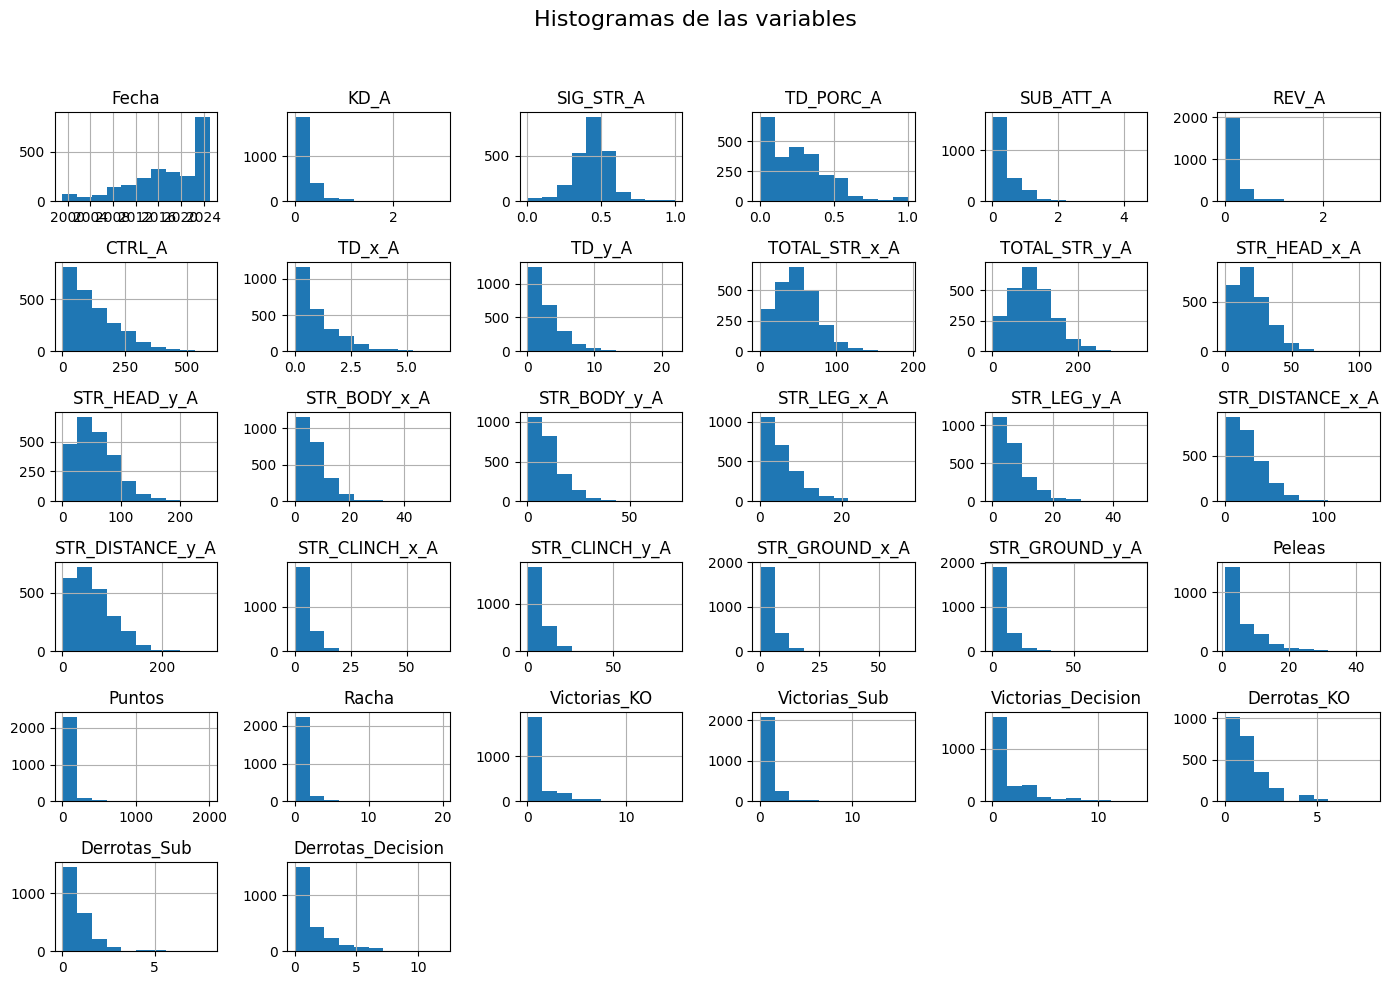

'Como vemos en los histogramas las variables no siguen distribuciones normales\ny predomina, como ya habíamos visto con los boxplots las colas hacía la derecha. Intentaremos\nutilizar todos los datos ya que no parecen errores de la página y en caso de que sea un problema para el \nmodelo eliminaremos algunos valores atípicos.'

In [11]:
df.hist(figsize=(14, 10))
plt.suptitle("Histogramas de las variables", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

"""Como vemos en los histogramas las variables no siguen distribuciones normales
y predomina, como ya habíamos visto con los boxplots las colas hacía la derecha. Intentaremos
utilizar todos los datos ya que no parecen errores de la página y en caso de que sea un problema para el 
modelo eliminaremos algunos valores atípicos."""

In [10]:
# Calcular el Z-score para todas las columnas numéricas
z_scores = df[numerical_columns].apply(zscore)

# Identificar valores con Z-score mayor a 3 o menor a -3
outliers_z = (z_scores.abs() > 3)

# Mostrar cuántos outliers hay en cada columna
outliers_count = outliers_z.sum()
print("\nNúmero de outliers detectados con Z-score:")
print(outliers_count[outliers_count > 0])


Número de outliers detectados con Z-score:
KD_A                  56
SIG_STR_A             45
TD_PORC_A             37
SUB_ATT_A             46
REV_A                 81
CTRL_A                27
TD_x_A                44
TD_y_A                34
TOTAL_STR_x_A         20
TOTAL_STR_y_A         14
STR_HEAD_x_A          22
STR_HEAD_y_A          21
STR_BODY_x_A          27
STR_BODY_y_A          35
STR_LEG_x_A           38
STR_LEG_y_A           41
STR_DISTANCE_x_A      23
STR_DISTANCE_y_A      27
STR_CLINCH_x_A        38
STR_CLINCH_y_A        36
STR_GROUND_x_A        35
STR_GROUND_y_A        38
Peleas                43
Puntos                49
Racha                 61
Victorias_KO          56
Victorias_Sub         51
Victorias_Decision    70
Derrotas_KO           47
Derrotas_Sub          43
Derrotas_Decision     38
dtype: int64
